In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import poisson, nbinom

# Examining an scRNA-Seq dataset
This dataset consists of ~3k scRNA profiles from peripheral blood mononuclear cells (PBMCs). You'll see it frequently used in many scRNA analysis tutorials.

In [4]:
pbmc = pd.read_csv('pbmc3k.csv.gz',index_col=0)
pbmc
# row: genes name
# col: cell name
# entries: expression level

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2.1,AL590523.1,CT476828.1,PNRC2.1,SRSF10.1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Examining the distribution of expression values
Let's have a look at one highly-expressed gene (actin, ACTB) and see if any of the simple models give a good fit to the distribution of values

<Axes: xlabel='ACTB', ylabel='Count'>

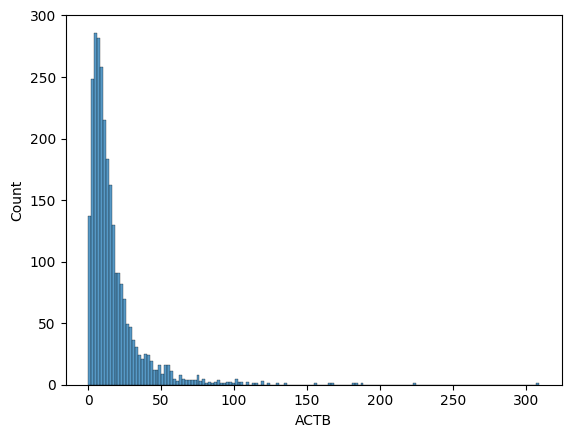

In [5]:
sns.histplot(pbmc['ACTB'])

The MLE of the poisson parameter $\lambda$ is just the sample mean:

In [6]:
lambda_hat = pbmc['ACTB'].mean()
pbmc['ACTB'].describe()

count    2700.000000
mean       17.541852
std        19.834236
min         0.000000
25%         7.000000
50%        12.000000
75%        21.000000
max       309.000000
Name: ACTB, dtype: float64

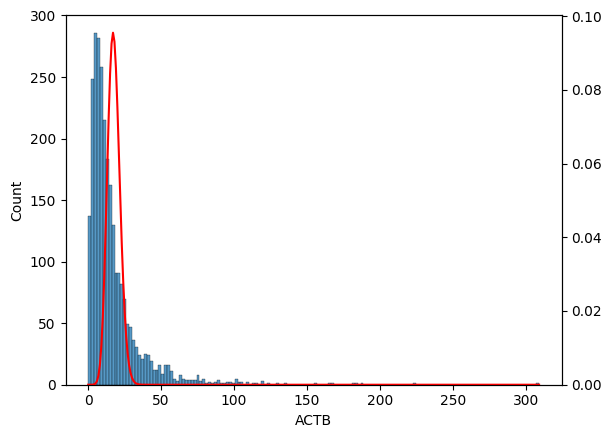

In [7]:
ax = sns.histplot(pbmc['ACTB'])
max_val = int(np.round(pbmc['ACTB'].max()))
x = np.linspace(0,max_val,max_val+1)
rv = poisson(lambda_hat)
ax2 = ax.twinx()
ax2 = sns.lineplot(x=x,y=rv.pmf(x),color='r', ax=ax2)
_=plt.ylim(0,None)

Now let's try the negative binomial:

In [8]:
mean = pbmc['ACTB'].mean()
var = pbmc['ACTB'].var()
p = mean / var
n = mean**2 / (var - mean)
p,n

(np.float64(0.04459072054198094), np.float64(0.8187107143846064))

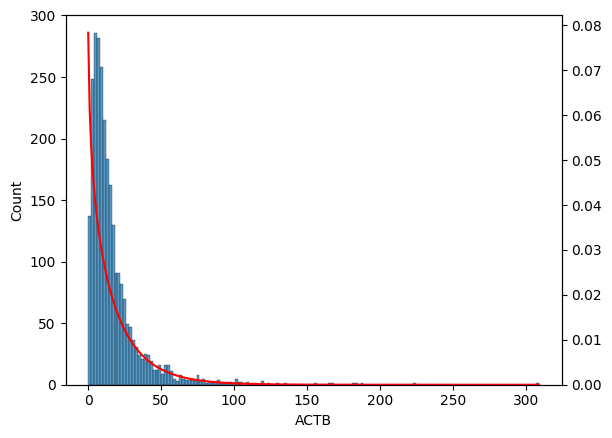

In [9]:
ax = sns.histplot(pbmc['ACTB'])
max_val = int(np.round(pbmc['ACTB'].max()))
x = np.linspace(0,max_val,max_val+1)
rv = nbinom(n,p)
ax2 = ax.twinx()
ax2 = sns.lineplot(x=x,y=rv.pmf(x),color='r', ax=ax2)
_=plt.ylim(0,None)

### Effect of normalization
So negative binomial certainly looks better but still a bit off. Let's have a look at the effect of "depth normalization"

In [10]:
def plot_poisson(data,gene):
    lambda_hat = data[gene].mean()
    ax = sns.histplot(data[gene])
    max_val = int(np.round(data[gene].max())) # round the maximum value of the gene expression
    x = np.linspace(0,max_val,max_val+1)
    rv = poisson(lambda_hat) # poisson is a method of scipy.stats for poisson distribution
    ax2 = ax.twinx() # create a twin y-axis
    ax2 = sns.lineplot(x=x,y=rv.pmf(x),color='r', ax=ax2)
    _=plt.ylim(0,None)

def plot_nbinom(data,gene):
    mean = data[gene].mean()
    var = data[gene].var() # var() is a method of pandas dataframe for calculating variance
    p = mean / var # p is the probability of success
    n = mean**2 / (var - mean) # n is the number of failures
    ax = sns.histplot(data[gene])
    max_val = int(np.round(data[gene].max()))  # round the maximum value of the gene expression
    x = np.linspace(0,max_val,max_val+1) # create a range of values from 0 to max_val
    rv = nbinom(n,p) # nbinom is a method of scipy.stats for negative binomial distribution
    ax2 = ax.twinx() # create a twin y-axis
    ax2 = sns.lineplot(x=x,y=rv.pmf(x),color='r', ax=ax2)
    _=plt.ylim(0,None)

In [11]:
pbmc_tpm = pbmc.copy()
pbmc_tpm = (pbmc_tpm.T/pbmc_tpm.sum(1)).T*10000

In [12]:
pbmc_tpm['ACTB'].describe()

count    2700.000000
mean       68.745090
std        54.178720
min         0.000000
25%        34.800275
50%        56.905382
75%        88.099234
max       844.772967
Name: ACTB, dtype: float64

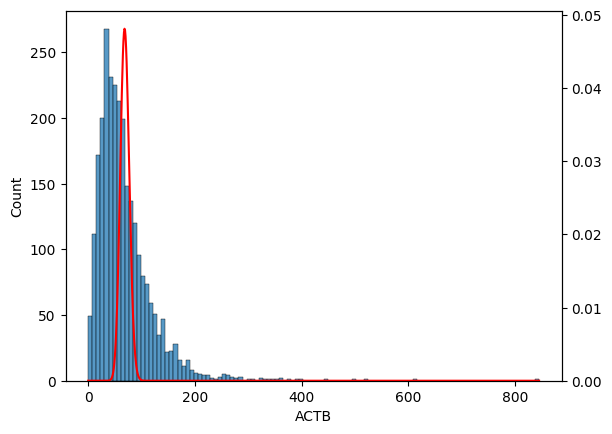

In [13]:
plot_poisson(pbmc_tpm,'ACTB')

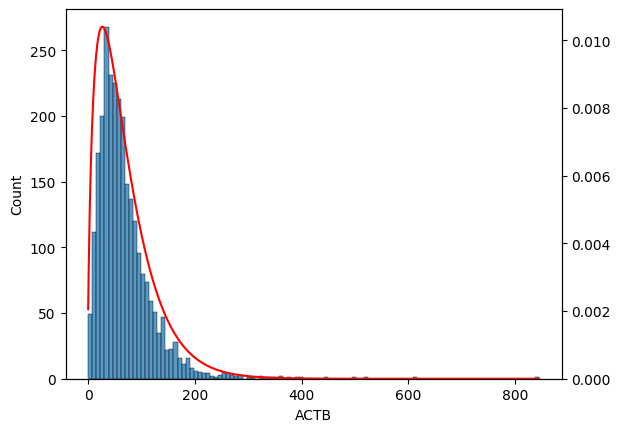

In [14]:
plot_nbinom(pbmc_tpm,'ACTB')

### Different expression levels
So NB looks pretty good for ACTB expression in depth normalized cells. Let's have a look at a few other genes with lower expression.

HLA-DR is an MHC Class II cell surface receptor. MHC Class II molecules are typically found on antigen presenting cells (like dendritic cells) that are important in initiating immune responses.

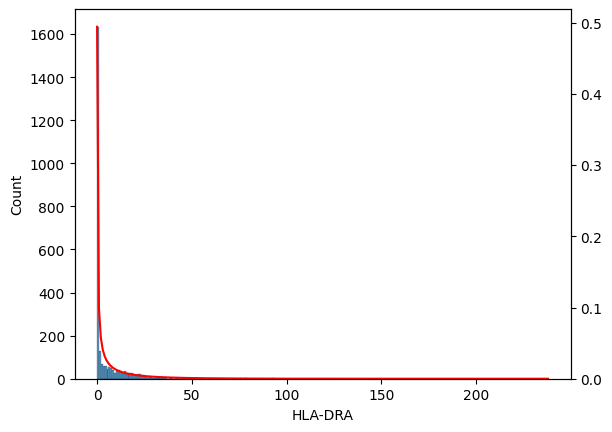

In [15]:
plot_nbinom(pbmc,'HLA-DRA')

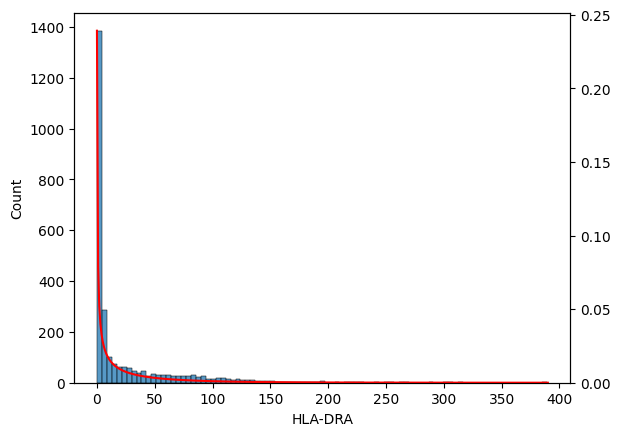

In [16]:
plot_nbinom(pbmc_tpm,'HLA-DRA')

CD45 (gene symbol PTPRC) receptor-linked phospatase whose expression is commonly used as a pan-leukocyte (immune cell) marker

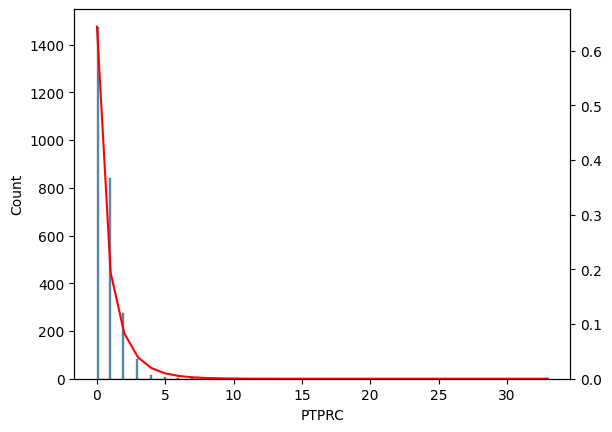

In [17]:
plot_nbinom(pbmc,'PTPRC')

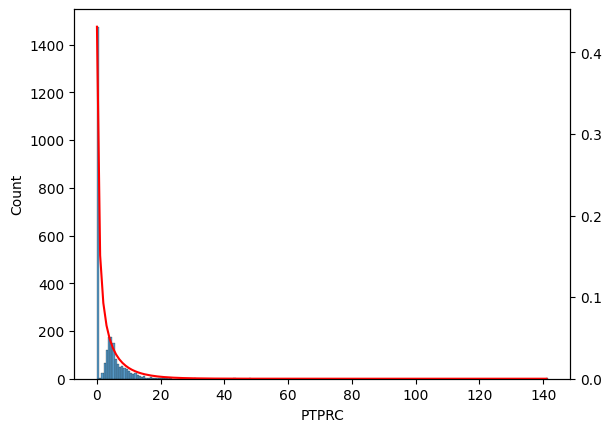

In [18]:
plot_nbinom(pbmc_tpm,'PTPRC')

## Logistic regression
Using code from Ntranos et al published [here](https://github.com/pachterlab/NYMP_2018/blob/master/10x_example-logR/10x_example_logR-TCC_notebook.ipynb).

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [5]:
def plot_gene_filt(gene,threshold=20,_size=(8,5)):    
    ##########################################################################################
    try:
        ec_counts=np.array(np.sum(X[:,gene_names_to_ECs[gene]],axis=0))[0]
        gene_ecs0=np.array(gene_names_to_ECs[gene])[np.where(ec_counts>0)[0]]
        ec_counts=ec_counts[np.where(ec_counts>0)[0]]

        if len(ec_counts)==0:
            filtered_ecs=[]
            print(gene)
            print('filtered_ecs =',filtered_ecs)
            print('--------------------------------------------------------------------------------------------------------------')
        else:

            threshold=threshold

            gene_ecs=gene_ecs0[np.where(ec_counts>threshold)[0]]
            upto=len(gene_ecs)

            arg_srt_ec_counts=np.argsort(ec_counts)[::-1]
            ec_counts_srt=ec_counts[arg_srt_ec_counts]
            tot_counts = np.sum(ec_counts)

            plt.figure(figsize=_size)
            plt.stem(range(len(ec_counts)),ec_counts_srt,'gray',markerfmt='.')

            plt.xticks(range(len(ec_counts)),gene_ecs0[arg_srt_ec_counts],rotation='vertical')
            # plt.xlim([0,len(b)+0.9])

            fract=0
            if upto>0: 
                plt.stem(range(upto),ec_counts_srt[:upto])
                fract=np.sum(ec_counts_srt[:upto])/tot_counts

            sz=np.array( [len(EC_to_gene_names[i]) for i in gene_ecs0[arg_srt_ec_counts]])
            idx=np.where(sz==1)[0]
            idx_m=np.where(sz>1)[0]

            # plt.stem(idx[idx<=upto],threshold*np.ones_like(np.sort(ec_counts)[::-1][idx[idx<=upto]]),'r','.')

            filtered_ecs=list(gene_ecs0[arg_srt_ec_counts[idx[idx<upto]]])
            frac=0
            avg_cnt=0
            if len(filtered_ecs)>0: 
                if len(idx_m[idx_m<upto])>0: plt.stem(idx_m[idx_m<upto],ec_counts_srt[idx_m[idx_m<upto]],'-or')
                frac=np.sum(ec_counts_srt[idx[idx<upto]])/np.sum(ec_counts_srt[idx])
                avg_cnt=np.sum(ec_counts_srt[idx[idx<upto]])/X.shape[0]
            plt.axhline(y=threshold, color='darkred', linestyle='--',linewidth=1)
            plt.xlabel("equivalence classes",fontsize=16)
            plt.ylabel("umi counts (log scale)",fontsize=16)
            plt.yscale('log')
            plt.title(gene)

            print('threshold=',threshold,'('+'{0:.4f}'.format(threshold/X.shape[0])+' counts per cell)')
            plt.show()
            print('filtered_ecs =',filtered_ecs)
            print('\nfraction of counts in ecs above threshold:'+' {0:.1f}'.format(100*fract)+'%' )
            print('fraction of counts in filtered unique ecs:'+' {0:.1f}'.format(100*frac)+'%')
            print('average gene counts after filtering:'+' {0:.3f}'.format(avg_cnt)+' per cell')
            print('--------------------------------------------------------------------------------------------------------------')
    except KeyError:
        print(gene,' not found')

In [6]:
def logr_ecidx(ecidx,X1,X2):
    
    N1=X1.shape[0]
    N2=X2.shape[0]
    logr_labels = np.concatenate((np.ones(N1),np.zeros(N2)),axis=0)
    logr = LogisticRegression(C=1000)
    p_of_1=N1/float(N1+N2)
    llnull=(N1+N2)*(p_of_1*np.log(p_of_1) + (1-p_of_1)*np.log(1-p_of_1))
    k=len(ecidx)
    
    X1_ecidx=np.asarray(X1[:,ecidx].todense())
    X2_ecidx=np.asarray(X2[:,ecidx].todense())
    c=np.concatenate([X1_ecidx,X2_ecidx])
    #c=np.concatenate([X1[:,ecidx],X2[:,ecidx]])
    logr.fit(c,logr_labels)
    pred=np.array(logr.predict_proba(c)[:,1])
    gene_score=log_loss(logr_labels,pred)
    llf=-gene_score*(N1+N2)
    llr=llf-llnull
    llr_pval = stats.chi2.sf(2*llr,k) #survival function defined as 1-cdf
    
    return [logr,llr_pval]

In [ ]:
from scipy.io import mmread
import csv

X=mmread('raw_data/matrix.tcc.mtx.gz')
X=X.tocsr()

with open('raw_data/TX_to_ENST.csv', 'r') as csv_file:
    reader = csv.reader(csv_file,delimiter='\t')
    TX_to_ENST = dict(reader)
TX_to_ENST = {int(k): v for k,v in TX_to_ENST.items()}

with open('raw_data/TX_to_ENSG.csv', 'r') as csv_file:
    reader = csv.reader(csv_file,delimiter='\t')
    TX_to_ENSG = dict(reader)
TX_to_ENSG = {int(k): v for k,v in TX_to_ENSG.items()}

with open('raw_data/ENSG_to_name.csv', 'r') as csv_file:
    reader = csv.reader(csv_file,delimiter='\t')
    ENSG_to_name = dict(reader)

with open('raw_data/matrix.ec', 'r') as csv_file:
    reader = csv.reader(csv_file,delimiter='\t')
    EC_dict=dict(reader)
EC_dict = {int(k):[int(i) for i in v.split(',')] for k,v in EC_dict.items()}



## EC to gene_names map
EC_to_gene_names ={}
for k,v in EC_dict.items():
    EC_to_gene_names[k] = list(np.unique([ENSG_to_name[TX_to_ENSG[i]] for i in v]))



## Gene_names to EC map
gene_names_to_ECs={}
for k, v in EC_to_gene_names.items():
    for vi in v:
        gene_names_to_ECs[vi] = gene_names_to_ECs.get(vi, [])
        gene_names_to_ECs[vi].append(k)

labels=np.array(pd.read_csv('raw_data/cell.labels',header=None)).reshape(1,-1)[0]

In [ ]:
X

In [ ]:
len(EC_to_gene_names), len(gene_names_to_ECs)

In [ ]:
gene='PTPRC'
plot_gene_filt(gene,threshold=0.003*X.shape[0])

In [ ]:
X_naive=X[np.squeeze(labels=='Naive'),:]
X_mem=X[np.squeeze(labels=='Mem'),:]
X_cyto=X[np.squeeze(labels=='Cyto'),:]



ecidx = [62333, 214260, 214261, 69896, 223213, 76094, 214262]

X1=X_naive
X2=X_mem
A=logr_ecidx(ecidx,X1,X2)
print('pval=',A[1])

In [ ]:
X1_ecidx=X1[:,ecidx].todense()
X2_ecidx=X2[:,ecidx].todense()

P1=pd.DataFrame(X1_ecidx,columns=ecidx)
P1['cluster'] = 'CD4+/CD45RA+/CD25- Naive T-cells'
P2=pd.DataFrame(X2_ecidx,columns=ecidx)
P2['cluster'] = 'CD4+/CD45RO+ Memory T-cells'
#P=P1.append(P2)
P = pd.concat([P1,P2])
df = pd.melt(P,  id_vars='cluster')

plt.figure(figsize=(8,5))
ax=sns.barplot(x='variable', y='value', hue='cluster',palette=["#FF1493", "#6495ED"], data=df)
ax.set(xlabel='Equivalence Classes', ylabel='mean counts (TCCs)')
plt.title('PTPRC')
plt.setp(ax.get_legend().get_texts(), fontsize='13') 
plt.setp(ax.get_legend().get_title(), fontsize='0')
plt.show()

Gexp1=np.array(X1_ecidx.T.sum(axis=0))[0]
Gexp2=np.array(X2_ecidx.T.sum(axis=0))[0]

P1=pd.DataFrame(Gexp1.T,)
P1['cluster'] = 'CD4+/CD45RA+/CD25- Naive T-cells'
P2=pd.DataFrame(Gexp2.T)
P2['cluster'] = 'CD4+/CD45RO+ Memory T-cells'
#P=P1.append(P2)
P = pd.concat([P1,P2])
df = pd.melt(P,  id_vars='cluster')

plt.figure(figsize=(1,5))
ax=sns.barplot(x='variable', y='value', hue='cluster',palette=["#FF1493", "#6495ED"], data=df)
ax.set(xlabel='', ylabel='mean counts (Gene)')
ax.legend_.remove()
plt.title('PTPRC')
plt.show()